In [51]:
# # Reading all the files
# raw_path = '../input/brazilian-ecommerce/'
# olist_customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
# olist_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
# olist_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
# olist_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
# olist_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
# olist_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
# olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
# olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [53]:
# Order reviews dataset
df_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
print(df_reviews.info())

df_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [54]:
# df_reviews = df_reviews.fillna(' ')
# df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date'])
# df_reviews['review_answer_timestamp'] = pd.to_datetime(df_reviews['review_answer_timestamp'])
# print(df_reviews.info())

# df_reviews.head()

In [55]:
# df_reviews['time_hours_response'] = round((df_reviews['review_answer_timestamp'] - df_reviews['review_creation_date'])\
#                                     .dt.total_seconds() / 3600, 0)

# df_reviews.head()

In [56]:
df_comments = df_reviews.loc[:, ['review_score', 'review_comment_message']]
df_comments = df_comments.dropna(subset=['review_comment_message'])
df_comments = df_comments.reset_index(drop=True)
print(f'Dataset shape: {df_comments.shape}')
df_comments.columns = ['score', 'comment']
df_comments.head()

Dataset shape: (40977, 2)


,score,comment
0,5,Recebi bem antes do prazo estipulado.
1,5,Parabéns lojas lannister adorei comprar pela I...
2,4,aparelho eficiente. no site a marca do aparelh...
3,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
4,5,"Vendedor confiável, produto ok e entrega antes..."


**Breakline and Carriage Return**

In [57]:
def re_breakline(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('[\n\r]', ' ', r) for r in text_list]

In [58]:
# Creating a list of comment reviews
reviews = list(df_comments['comment'].values)

# Applying RegEx
reviews_breakline = re_breakline(reviews)
df_comments['re_breakline'] = reviews_breakline

print("Before:\n", reviews[48])
print('--------------------')
print("After:\n", reviews_breakline[48])

Before:
 Estava faltando apenas um produto, eu recebi hoje , muito obrigada!
Tudo certo!

Att 

Elenice.
--------------------
After:
 Estava faltando apenas um produto, eu recebi hoje , muito obrigada!  Tudo certo!    Att     Elenice.


**Sites and Hiperlinks**

In [59]:
def re_hiperlinks(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]

In [60]:
# Check is there any hyperlink
first_hyperlink_row = df_comments[df_comments['comment']\
                                  .str\
                                  .contains(r'''http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]
                                  |[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+''',
                                            na=False)]\
                                  .head(1)

print("First row with a hyperlink:")
print(first_hyperlink_row.index)
print(first_hyperlink_row.values)

First row with a hyperlink:
Int64Index([10607], dtype='int64')
[[2
  'comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto http://prntscr.com/jkx7hr quando o produto chegou aqui veio todos com a mesma cor, tabaco http://prntscr.com/'
  'comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto http://prntscr.com/jkx7hr quando o produto chegou aqui veio todos com a mesma cor, tabaco http://prntscr.com/']]


In [61]:
# Applying RegEx
reviews_hiperlinks = re_hiperlinks(reviews_breakline)
df_comments['re_hiperlinks'] = reviews_hiperlinks

print("Before:\n", reviews_breakline[10607])
print('--------------------')
print("After:\n", reviews_hiperlinks[10607])

Before:
 comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto http://prntscr.com/jkx7hr quando o produto chegou aqui veio todos com a mesma cor, tabaco http://prntscr.com/
--------------------
After:
 comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto  link  quando o produto chegou aqui veio todos com a mesma cor, tabaco  link 


**Dates**

In [62]:
def re_dates(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    pattern = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'
    return [re.sub(pattern, ' date ', r) for r in text_list]

In [63]:
# Is there any date with format '/' or '\'

first_date_row = df_comments[df_comments['comment'].str.contains(r'\d{2}[/-]\d{2}[/-]\d{4}', na=False)].head(1)

print("First row with a hyperlink:")
print(first_date_row.index)
print(first_date_row.values)

First row with a hyperlink:
Int64Index([567], dtype='int64')
[[1
  'ENTREGA MUITO DEMORADA, COMPREI EM 26/03/2018 E ATÉ AGORA NÃO RECEBI OS PRODUTOS'
  'ENTREGA MUITO DEMORADA, COMPREI EM 26/03/2018 E ATÉ AGORA NÃO RECEBI OS PRODUTOS'
  'ENTREGA MUITO DEMORADA, COMPREI EM 26/03/2018 E ATÉ AGORA NÃO RECEBI OS PRODUTOS']]


In [64]:
reviews_dates = re_dates(reviews_hiperlinks)
df_comments['re_dates'] = reviews_dates

print("Before:\n", reviews_hiperlinks[567])
print('--------------------')
print("After:\n", reviews_dates[567])

Before:
 ENTREGA MUITO DEMORADA, COMPREI EM 26/03/2018 E ATÉ AGORA NÃO RECEBI OS PRODUTOS
--------------------
After:
 ENTREGA MUITO DEMORADA, COMPREI EM  date  E ATÉ AGORA NÃO RECEBI OS PRODUTOS


**Money pattern**

In [65]:
def re_money(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' dinheiro ', r) for r in text_list]

In [66]:
# Is there any data with format 'R$ __,__'

first_price_row = df_comments[df_comments['comment'].str.contains(r'R\$\s\d{1,3},\d{2}', na=False)].head(1)

print("First row with a hyperlink:")
print(first_price_row.index)
print(first_price_row.values)

First row with a hyperlink:
Int64Index([45], dtype='int64')
[[1
  'Este foi o pedido\r\nBalde Com 128 Peças - Blocos De Montar 2 un - R$ 25,00 cada (NÃO FOI ENTREGUE)\r\nVendido e entregue targaryen\r\nTapete de Eva Nº Letras 36 Peças Crianças 1 un - R$ 35,90 (ESTE FOI ENTREG'
  'Este foi o pedido  Balde Com 128 Peças - Blocos De Montar 2 un - R$ 25,00 cada (NÃO FOI ENTREGUE)  Vendido e entregue targaryen  Tapete de Eva Nº Letras 36 Peças Crianças 1 un - R$ 35,90 (ESTE FOI ENTREG'
  'Este foi o pedido  Balde Com 128 Peças - Blocos De Montar 2 un - R$ 25,00 cada (NÃO FOI ENTREGUE)  Vendido e entregue targaryen  Tapete de Eva Nº Letras 36 Peças Crianças 1 un - R$ 35,90 (ESTE FOI ENTREG'
  'Este foi o pedido  Balde Com 128 Peças - Blocos De Montar 2 un - R$ 25,00 cada (NÃO FOI ENTREGUE)  Vendido e entregue targaryen  Tapete de Eva Nº Letras 36 Peças Crianças 1 un - R$ 35,90 (ESTE FOI ENTREG']]


In [67]:
reviews_money = re_money(reviews_dates)
df_comments['re_money'] = reviews_money

print("Before:\n", reviews_dates[45])
print('--------------------')
print("After:\n", reviews_money[567])

Before:
 Este foi o pedido  Balde Com 128 Peças - Blocos De Montar 2 un - R$ 25,00 cada (NÃO FOI ENTREGUE)  Vendido e entregue targaryen  Tapete de Eva Nº Letras 36 Peças Crianças 1 un - R$ 35,90 (ESTE FOI ENTREG
--------------------
After:
 ENTREGA MUITO DEMORADA, COMPREI EM  date  E ATÉ AGORA NÃO RECEBI OS PRODUTOS


**Numbers**

In [68]:
def re_numbers(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('[0-9]+', ' numero ', r) for r in text_list]

In [69]:
# Is there any data with number format.

first_number_row = df_comments[df_comments['comment'].str.contains(r'[0-9]+', na=False)].head(1)

print("First row with a hyperlink:")
print(first_number_row.index)
print(first_number_row.values)

First row with a hyperlink:
Int64Index([2], dtype='int64')
[[4
  'aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho'
  'aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho'
  'aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho'
  'aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho'
  'aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho']]


In [70]:
reviews_numbers = re_numbers(reviews_money)
df_comments['re_numbers'] = reviews_numbers

print("Before:\n", reviews_money[2])
print('--------------------')
print("After:\n", reviews_numbers[2])

Before:
 aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho
--------------------
After:
 aparelho eficiente. no site a marca do aparelho esta impresso como  numero desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho


**Negation**

In [71]:
def re_negation(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negação ', r) for r in text_list]

In [72]:
# Check

first_negation_row = df_comments[df_comments['comment'].str.contains(r'([nN][ãÃaA][oO]|[ñÑ]| [nN] )', na=False)].head(1)

print("First row with a hyperlink:")
print(first_negation_row.index)
print(first_negation_row.values)

First row with a hyperlink:
Int64Index([11], dtype='int64')
[[1 'Não gostei ! Comprei gato por lebre'
  'Não gostei ! Comprei gato por lebre'
  'Não gostei ! Comprei gato por lebre'
  'Não gostei ! Comprei gato por lebre'
  'Não gostei ! Comprei gato por lebre'
  'Não gostei ! Comprei gato por lebre']]


C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_15028\3038965196.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  first_negation_row = df_comments[df_comments['comment'].str.contains(r'([nN][ãÃaA][oO]|[ñÑ]| [nN] )', na=False)].head(1)


In [73]:
reviews_negation = re_negation(reviews_numbers)
df_comments['re_negation'] = reviews_negation

print("Before:\n", reviews_numbers[11])
print('--------------------')
print("After:\n", reviews_negation[11])

Before:
 Não gostei ! Comprei gato por lebre
--------------------
After:
  negação  gostei ! Comprei gato por lebre


**Special Characters**

In [74]:
def re_special_chars(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    return [re.sub('[^\w\s]', ' ', r) for r in text_list]

In [75]:
# Check

first_special_row = df_comments[df_comments['comment'].str.contains(r'[^\w\s]', na=False)].head(1)

print("First row with a special character:")
print(first_special_row.index)
print(first_special_row.values)

First row with a special character:
Int64Index([0], dtype='int64')
[[5 'Recebi bem antes do prazo estipulado.'
  'Recebi bem antes do prazo estipulado.'
  'Recebi bem antes do prazo estipulado.'
  'Recebi bem antes do prazo estipulado.'
  'Recebi bem antes do prazo estipulado.'
  'Recebi bem antes do prazo estipulado.'
  'Recebi bem antes do prazo estipulado.']]


In [76]:
df_comments['comment'].iloc[133]

'Cada vez que compro mais fico satisfeita parabéns pela honestidade com seus clientes 👏👏👏👏?'

In [77]:
reviews_special_chars = re_special_chars(reviews_negation)
df_comments['re_special_chars'] = reviews_special_chars

print("Before:\n", reviews_negation[133])
print('--------------------')
print("After:\n", reviews_special_chars[133])

Before:
 Cada vez que compro mais fico satisfeita parabéns pela honestidade com seus clientes 👏👏👏👏?
--------------------
After:
 Cada vez que compro mais fico satisfeita parabéns pela honestidade com seus clientes      


**Additional Whitespaces**

In [78]:
def re_whitespaces(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Applying regex
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end

In [79]:
first_addition_whitespace_row = df_comments[df_comments['comment'].str.contains(r'^\s+|\s+$', na=False)].head(1)

print("First row with a special character:")
print(first_addition_whitespace_row.index)
print(first_addition_whitespace_row.values)

First row with a special character:
Int64Index([3], dtype='int64')
[[4 'Mas um pouco ,travando...pelo valor ta Boa.\r\n'
  'Mas um pouco ,travando...pelo valor ta Boa.  '
  'Mas um pouco ,travando...pelo valor ta Boa.  '
  'Mas um pouco ,travando...pelo valor ta Boa.  '
  'Mas um pouco ,travando...pelo valor ta Boa.  '
  'Mas um pouco ,travando...pelo valor ta Boa.  '
  'Mas um pouco ,travando...pelo valor ta Boa.  '
  'Mas um pouco  travando   pelo valor ta Boa   ']]


In [80]:
reviews_whitespaces = re_whitespaces(reviews_special_chars)
df_comments['re_whitespaces'] = reviews_whitespaces

print("Before:\n", reviews_special_chars[3])
print('--------------------')
print("After:\n", reviews_whitespaces[3])

Before:
 Mas um pouco  travando   pelo valor ta Boa   
--------------------
After:
 Mas um pouco travando pelo valor ta Boa


# Stopwords

In [81]:
# # DataPrep
# import re
# from nltk.corpus import stopwords
# from nltk.stem import RSLPStemmer
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.pipeline import Pipeline
# import joblib

In [82]:
# Examples of some portuguese stopwords
pt_stopwords = stopwords.words('portuguese')
print(f'Total portuguese stopwords in the nltk.corpous module: {len(pt_stopwords)}')
pt_stopwords[:10]

Total portuguese stopwords in the nltk.corpous module: 207


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [83]:
# # # Download nltk
# import nltk
# nltk.download('stopwords')

In [84]:
from nltk.corpus import stopwords

print(stopwords)

<WordListCorpusReader in 'C:\\Users\\Baha Tegar\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


In [85]:
from nltk.corpus import stopwords

def stopwords_removal(text, cached_stopwords=stopwords.words('portuguese')):
    """
    Args:
    ---------
    text: list object where the stopwords will be removed [type: list]
    cached_stopwords: stopwords to be applied on the process [type: list, 
        default: stopwords.words('portugese')]
    """
    
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]


In [86]:
# Removing stopwords and looking at some examples
reviews_stopwords = [' '.join(stopwords_removal(review)) for review in reviews_whitespaces]
df_comments['stopwords_removed'] = reviews_stopwords

print("Before:\n", reviews_whitespaces[0])
print('--------------------')
print("After:\n", reviews_stopwords[0])

Before:
 Recebi bem antes do prazo estipulado
--------------------
After:
 recebi bem antes prazo estipulado


# Stemming

In [87]:
# import nltk
# nltk.download('rslp')

In [88]:
from nltk.stem import RSLPStemmer

def stemming_process(text, stemmer=RSLPStemmer()):
    """
    Args:
    ----------
    text: list object where the stopwords will be removed [type: list]
    
    stemmer: type of stemmer to be applied [type: class, default: RSLPStemmer()]
    """
    
    return [stemmer.stem(c) for c in text.split()]

In [89]:
reviews_stemmer = [' '.join(stemming_process(review)) for review in reviews_stopwords]
df_comments['stemming'] = reviews_stemmer

print("Before:\n", reviews_stopwords[0])
print('--------------------')
print("After:\n", reviews_stemmer[0])

Before:
 recebi bem antes prazo estipulado
--------------------
After:
 receb bem ant praz estipul


# Feature Extraction

In [90]:
# DataPrep
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# import lightgbm as lgb

In [91]:
def extract_features_from_corpus(corpus, vectorizer, df=False):
    """
    Args
    ------------
    text: text to be transformed into a document-term matrix [type: string]
    vectorizer: engine to be used in the transformation [type: object]
    """
    
    # Extracting features
    corpus_features = vectorizer.fit_transform(corpus).toarray()
    features_names = vectorizer.get_feature_names()
    
    # Transforming into a dataframe to give interpetability to the process
    df_corpus_features = None
    if df:
        df_corpus_features = pd.DataFrame(corpus_features, columns=features_names)
    
    return corpus_features, df_corpus_features

In [95]:
def extract_features_from_corpus(corpus, vectorizer, df=False):
    features = vectorizer.fit_transform(corpus)
    
    if df:
        feature_names = vectorizer.get_feature_names_out()
        df_features = pd.DataFrame(features.toarray(), columns=feature_names)
        return features, df_features
    else:
        return features

**CountVectorizer**

In [92]:
def find_patterns(re_pattern, text_list):
    """
    Args:
    ---------
    re_pattern: regular expression pattern to be used on search [type: string]
    text_list: list with text strings [type: list]
    
    Returns:
    positions_dict: python dictionary with key-value pars as below:
        text_idx: [(start_pattern1, end_pattern1), (start_pattern1, end_pattern2), ... (start_n, end_n)]
    """
    
    # Compiling the Regular Expression passed as a arg
    p = re.compile(re_pattern)
    positions_dict = {}
    i = 0
    for c in text_list:
        match_list = []
        iterator = p.finditer(c)
        for match in iterator:
            match_list.append(match.span())
        control_key = f'Text idx {i}'
        if len(match_list) == 0:
            pass
        else:
            positions_dict[control_key] = match_list
        i += 1
        
    """p = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    pattern_dict = find_patterns(p, reviews_breakline)
    print(len(pattern_dict))
    pattern_dict
    for idx in [int(c.split(' ')[-1]) for c in list(pattern_dict.keys())]:
        print(f'{reviews_breakline[idx]}\n')"""

    return positions_dict

In [93]:
# Applying RegEx
reviews_negation = re_negation(reviews_numbers)
df_comments['re_negation'] = reviews_negation

# Verifying results
print("Before:\n", reviews_negation[0])
print('--------------------')
print("After:\n", reviews_numbers[0])

Before:
 Recebi bem antes do prazo estipulado.
--------------------
After:
 Recebi bem antes do prazo estipulado.


In [96]:
# Creating an object for the CountVectorizer class
count_vectorizer = CountVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=pt_stopwords)

# Extracting features for the corpus
countv_features, df_countv_features = extract_features_from_corpus(reviews_stemmer, count_vectorizer, df=True)
print(f'Shape of countv_features matrix: {countv_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_countv_features.head()

Shape of countv_features matrix: (40977, 300)

Example of DataFrame of corpus features:


,abr,acab,ach,acontec,acord,ador,adquir,agor,aguard,aind,...,vei,vem,vend,ver,vez,vier,volt,vou,ótim,únic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


**TF-IDF**

In [97]:
# Creating an object for the CountVectorizer class
tfidf_vectorizer = TfidfVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=pt_stopwords)

# Extracting features for the corpus
tfidf_features, df_tfidf_features = extract_features_from_corpus(reviews_stemmer, tfidf_vectorizer, df=True)
print(f'Shape of tfidf_features matrix: {tfidf_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_tfidf_features.head()

Shape of tfidf_features matrix: (40977, 300)

Example of DataFrame of corpus features:


,abr,acab,ach,acontec,acord,ador,adquir,agor,aguard,aind,...,vei,vem,vend,ver,vez,vier,volt,vou,ótim,únic
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.319302,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.196792,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.461052,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


**Labelling Data**

In [103]:
score_counts = df_comments.score.value_counts()

<BarContainer object of 5 artists>

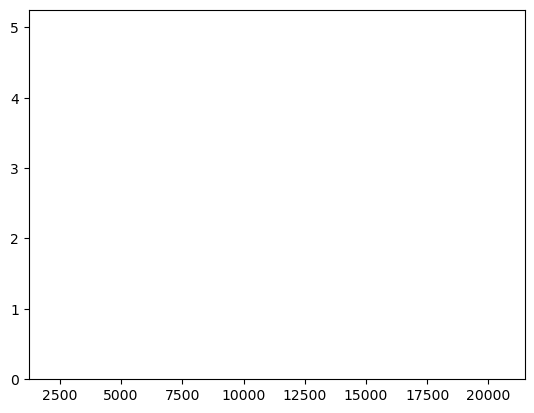

In [104]:
score_counts = df_comments.score.value_counts()
plt.bar(score_counts.values, score_counts.index, color ='maroon', 
        width = 0.4)